# Pymaceuticals Inc.
---

### Analysis

Pymaceuticals' drug of interest, Capomulin, outperforms every other drug regimen except Ramicane, a roughly equal competitor.

Naturally, we have to sabotage the Ramicane company to ensure market dominance.

The sample data plot for one mouse, l509, elegantly displays a strong decline in tumor volume over the 45 days of the drug trial. It would be useful for displaying drug effectiveness (for marketing, investors, etc.).

--- 

#### Notes

Capomulin and Ramicane are the only clear winners, showing about a 10mm3 - 15mm3 reduction in final tumor volume after 45 days (20% - 50% less than every other one of the 9 drug types).

Mean and median tumor volume track closely together per all 11 drug regimens. Same with variance, standard deviation, and SEM. The data appears to have been cleaned well.

Note that Capomulin and Ramicane have slightly more mouse timepoints, indicating a few more mice (~4) in the sample size, generally resulting in greater precision with the results.

Capomulin and Ramicane perform similarly on final tumor volume (30-40mm3), and better than Infubinol and Ceftamin (50-65mm3). The remaining 7 drugs are in the Infubinol and Ceftamin range.

Gender is roughly distributed in the sample size. It shouldn't have any effect on the drug treatment, assuming gender is evenly distributed amongst the drug sample populations.

Perhaps unsurprisingly, the correlation coefficient between mouse weight and average tumor volume is 0.84, very strong. Bigger mice have bigger tumors. Smaller mice have smaller tumors.

--- 

#### Questions (like a good Big Pharma company, we should ignore these)

We should actually compare starting tumor size to final tumor size for all drug regimens. While the plot for mouse l509 looks good, it's basically cherry-picked, anecdotal data.

Is the sample size (248 mice over 11 drug trials) large enough to be statistically valid?

--- 

#### Conclusion

Capomulin works well, and Ramicane is our only valid competitor.

--- 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(
    study_results, mouse_metadata, on=["Mouse ID"], how="left"
)

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_data_complete["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_data_complete[
    mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"])
]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_data_complete[mouse_data_complete["Mouse ID"].isin(duplicate_mice)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = mouse_data_complete[~mouse_data_complete["Mouse ID"].isin(duplicate_mice)]
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
tmp = df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
drug_summary = pd.DataFrame(
    {
        "Mean Tumor Volume": tmp.mean(),
        "Median Tumor Volume": tmp.median(),
        "Tumor Volume Variance": tmp.var(),
        "Tumor Volume Std. Dev.": tmp.std(),
        "Tumor Volume Std. Err.": tmp.sem(),
    }
)
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    ["mean", "median", "var", "std", "sem"]
).style.set_caption("Tumor Volume (mm3)")

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

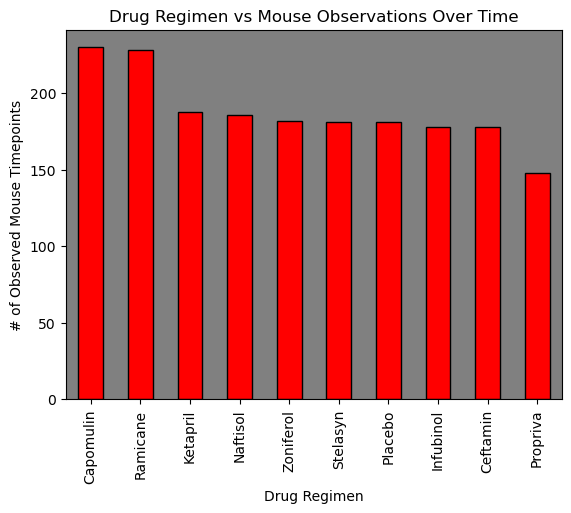

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_per_drug = df["Drug Regimen"].value_counts()
total_per_drug.plot.bar(
    x="Drug Regimen",
    y="Timepoint",
    xlabel="Drug Regimen",
    ylabel="# of Observed Mouse Timepoints",
    edgecolor="black",
    color="red",
)
# gca = get current axes
plt.gca().set_facecolor("grey")
plt.title("Drug Regimen vs Mouse Observations Over Time")
plt.show()

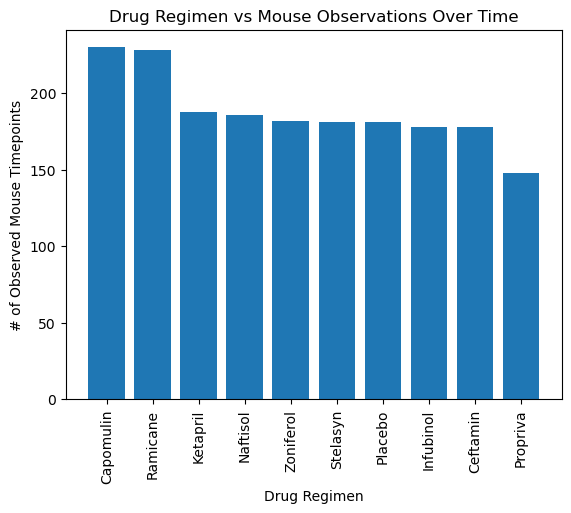

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# plt.figure(figsize=[16,4])
plt.bar(total_per_drug.index, total_per_drug.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.title("Drug Regimen vs Mouse Observations Over Time")
plt.show()

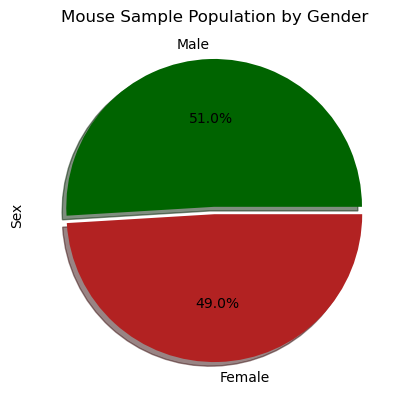

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
total_per_sex = df["Sex"].value_counts()
total_per_sex.plot(
    kind="pie",
    autopct="%1.1f%%",
    explode=[0.05, 0],
    shadow=True,
    colors=["darkgreen", "firebrick"],
)
plt.title("Mouse Sample Population by Gender")
plt.show()

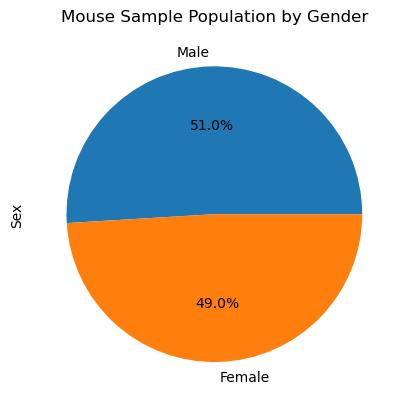

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.ylabel("Sex")
plt.pie(total_per_sex.values, labels=total_per_sex.index, autopct="%1.1f%%")
plt.title("Mouse Sample Population by Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_size = df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = pd.merge(max_tumor_size, df, on=["Mouse ID", "Timepoint"])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_of_interest = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
outliers = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments_of_interest:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    temp = merged.loc[merged["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # calculate IQR and quartiles
    q1 = temp.quantile(0.25)
    q3 = temp.quantile(0.75)
    iqr = q3 - q1
    # add subset
    tumor_vol.append(temp)
    # Determine outliers using upper and lower bounds
    high = q3 + iqr * 1.5
    low = q1 - iqr * 1.5
    # store outliers in dict and print
    outliers[drug] = temp.loc[(temp < low) | (temp > high)]
    print(f"{drug}'s potential outliers: {outliers[drug]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


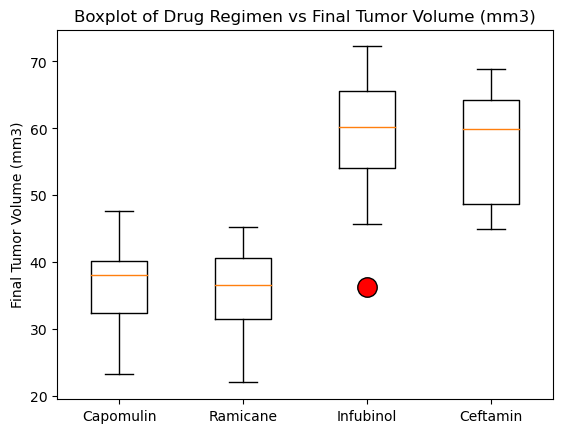

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(
    tumor_vol,
    labels=treatments_of_interest,
    flierprops={"markerfacecolor": "red", "markersize": 14},
)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Boxplot of Drug Regimen vs Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

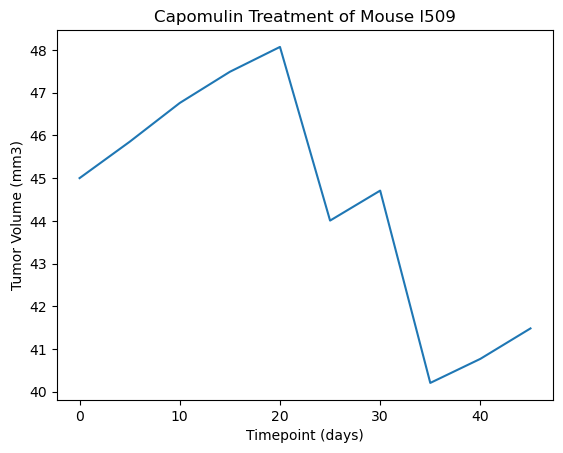

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = df[df["Mouse ID"] == "l509"]
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin Treatment of Mouse l509");

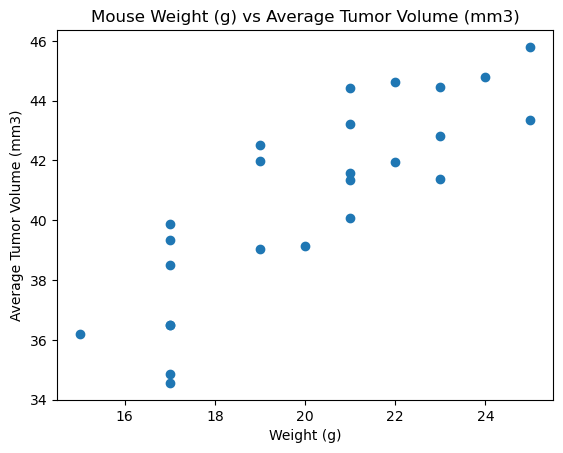

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = df[df["Drug Regimen"] == "Capomulin"]
mean_tumor_vol = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mean_weight = capomulin.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(mean_weight, mean_tumor_vol)
plt.title("Mouse Weight (g) vs Average Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)");

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


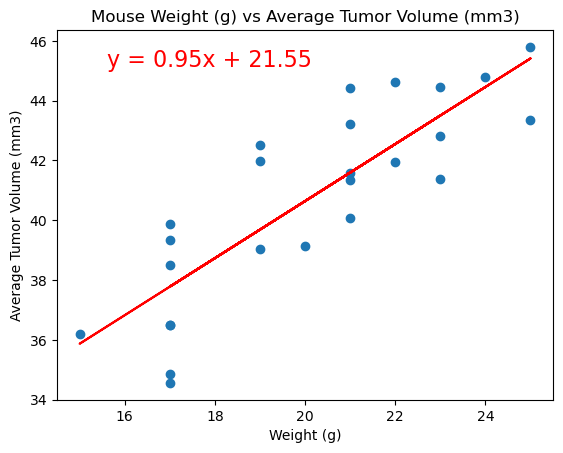

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# prints out correlation coefficient
coeff = st.pearsonr(mean_weight, mean_tumor_vol)
print(
    f"The correlation between mouse weight and the average tumor volume is {coeff[0]:.2f}"
)
# plot scatter and regression line
plt.scatter(mean_weight, mean_tumor_vol)
lin_reg = st.linregress(mean_weight, mean_tumor_vol)
# lin_reg[0] is the slope, lin_reg[1] is the y-intercept
y = lin_reg[0] * mean_weight + lin_reg[1]
plt.plot(mean_weight, y, color="r")
plt.title("Mouse Weight (g) vs Average Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.annotate(
    f"y = {lin_reg[0]:.2f}x + {lin_reg[1]:.2f}",
    xy=(0.1, 0.9),
    xycoords=plt.gca(),
    color="red",
    fontsize=16,
)
plt.show()